# Chapter 1 Dynamic Programming and Bellman Equations

## Example: Shortest Path Problem

In this example, we will solve the following shortest path problem using deterministic dynamic programming (DP).

### Shortest Path Problem 

We are given an $m\times n$ grid world with nonpositive rewards inside each grid. Consider an agent walking from the source to the destination, where the source is always located at the lower-left corner (i.e. grid $(m-1,0)$, and the destination is always located at the upper-right corner (i.e. grid $(0,n-1)$). When the agent reaches a grid, the nonpositive reward inside the grid will incur. The objective of this problem is to find a path from the source to the destination such that the total reward is maximized. This can also be interpreted as finding the shortest path if we view the absolute value of the reward as the length of the path.

For example, consider the grid world in the following figure, where the red squares are the source and the destination and the number inside each grid is the reward.

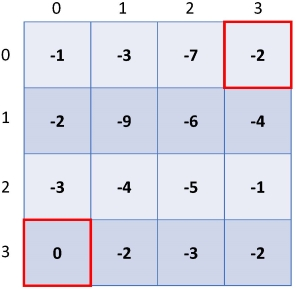

Fig. 1. An example of the grid world.

### Formulation

This problem can be formulated as finite-horizon deterministic DP problem. First we notice that the length of the path that maximizes the total reward, i.e., the length of the shortest path, must be smaller than $mn$. Hence, it suffices to consider a finite horizon problem with fixed horizon $mn-1$ and we allow the agent to stay in the current grid for each step. We define

- Stage $k$: the time when we make decision on the $k^{\mathrm{th}}$ step, $k=0,1,\ldots,mn-2$. Stage $mn-1$ is the stage after all $mn-1$ decisions.
    
- State $x_k$: the grid where the agent is located at stage $k$.
    
    For example, $x_k=(2,0)$ means that the agent is located in the grid of row $2$, column $0$.
    The initial state $x_0=(m-1, 0)$, which is the starting point of the agent.
    
- Action $u_k$: 
    
    $u_k=0$: stay, $u_k=1$: up, $u_k=2$: right, $u_k=3$: down, or $u_k=4$: left.
    
    Note that if the agent is at the border, then they cannot move in some of the directions. For example, if the agent is in grid $(3,3)$ in Fig. 1, they cannot move right or down.

- State transition function:

    \begin{align*}
        x_{k+1} = f_k(x_k, u_k) = \begin{cases}
                (x_{k,i}, x_{k,j}), & u_k=0 \\
                (x_{k,i}-1, x_{k,j}), & u_k=1 \\
                (x_{k,i}, x_{k,j}+1), & u_k=2 \\
                (x_{k,i}+1, x_{k,j}), & u_k=3 \\
                (x_{k,i}, x_{k,j}-1), & u_k=4,
                \end{cases}
    \end{align*}
    
    where $(x_{k,i},x_{k,j})$ is the coordinate of the state $x_k$.
    
    For example, if $x_k=(3,0)$, $u_k=1$, then $x_{k+1}=f_k(x_k,u_k)=(2,0)$.

- Reward $r_k(x_k,u_k)$: the reward obtained by taking action $u_k$ in state $x_k$ at stage $k$.
    
    If $u_k=0$, then $r_k(x_k,u_k)=0$. Otherwise, $r_k(x_k,u_k)$ is the number inside the grid $x_{k+1}$. Consider the example in Fig. 1. If $x_k=(3,0)$ and $u_k=1$ , $r_k((3,0),0)=-3$.

- Goal: maximize the total reward $\sum_{k=0}^{mn-2} r_k(x_k,u_k)$.


### Value Function

Then we can define the value function in this problem.
Let $V_k(x_k)$ denote the optimal value function for state $x_k$ at stage $k$, defined by
$$
V_k(x_k) = \max_{u_k,...u_{mn-2}} \sum_{j=k}^{mn-2} r_j(x_j, u_j) + V_{mn-1}(x_{mn-1}),
$$
where we define
\begin{align*}
    V_{mn-1}(x_{mn-1}) = \begin{cases}
    0, & x_{mn-1}=(0, n-1)\\
    -\infty, & \text{else},
    \end{cases}
\end{align*}
which means that if the final state is not the destination $(0,n-1)$ then the value should be minus infinity, because our goal is to find the shortest path to the destination.

### Bellman Equation

Next, we can write down the Bellman equation for this problem.
Let $\mathcal{U}_k(x_k)$ be the set of possible actions in state $x_k$. Then for $k=0,1,...,mn-2$, we have

\begin{align}
    V_k(x_k) = & \max_{u_k\in \mathcal{U}_k(x_k)}\{r_k(x_k, u_k) + V_{k+1}(x_{k+1})\}.
\end{align}

Then we can recursively solve $V_k(\cdot)$ using the Bellman equation. After obtaining the value function $V_k(\cdot)$, we can find the sequence of actions that maximize the total reward by calculating forward with $V_k(\cdot)$. Finally, we can drop the "stay" action and obtain the shortest path by recording the state that the agent visited. For example, in Fig. 1, the shortest path from [3,0] to [0,3] is given by the following list: 

	[[3,0],[3,1],[3,2],[3,3],[2,3],[1,3],[0,3]].


## Codes

### Backward Search

We will calculate the optimal value function backward using the Bellman equation, i.e., compute the values $V_{mn-1}(x_{mn-1}), V_{mn-2}(x_{mn-2}),\ldots, V_0(x_0)$.

For the Python function `backward_cal` in the next cell, the inputs are

- `m`: the number of rows.

- `n`: the number of columns.

- `rewards`: the reward matrix for the grid world. It is a numy array with shape `(m, n)`. Each element in `rewards` represents the reward in the corresponding grid. For example, `rewards[2, 0]` is the reward in the grid of row $2$ and column $0$, which is $-3$ in Fig.1.


The output `value_function` is the value function $V_k(x_k)$, a numpy array with shape `(mn, mn)`. `value_function[k, l]` represents the value at stage $k$ and state $(x_{k,i}, x_{k,j})$ where $x_{k,i}=⌊l/n⌋$ and $x_{k,j}=l~\mathrm{mod}~n$, i.e., $l= x_{k,i}n + x_{k,j}$


In [ ]:
# Import packages. Run this cell.

import numpy as np

In [ ]:
def backward_cal(m, n, rewards):
    """
    Calculate the optimal value function $V_{k}(x_k)$ using the Bellman equation
    Args:
        m: the number of rows
        n: the number of columns.
        rewards: a numy array with shape (m, n). rewards[i, j] represents the reward in grid (i, j)
    Returns:
        value_function: a numpy array with shape (mn, mn). `value_function[k, l]` represents the value at stage k and state (x_{k,i}, x_{k,j}) where x_{k,i}=⌊l/n⌋ and x_{k,j}=l mod n, that is, l = x_{k,i}*n + x_{k,j}
    """
    value_function = np.zeros((m * n, m * n))
    for i in range(m):
        for j in range(n):
            if i != 0 or j != n - 1: 
                value_function[m * n - 1, i * n + j] = np.NINF
    
    for k in range(m * n - 2, -1, -1):
        for i in range(m):
            for j in range(n):
                state = i * n + j
                values = np.zeros((5,))

                # the value of stay
                values[0] = value_function[k + 1, state]

                # the value of going up
                if i == 0:
                    values[1] = np.NINF
                else:
                    values[1] = rewards[i - 1, j] + value_function[k + 1, state - n]

                # the value of going right
                if j == n - 1:
                    values[2] = np.NINF
                else:
                    values[2] = rewards[i, j + 1] + value_function[k + 1, state + 1]
                
                # the value of going down
                if i == m - 1:
                    values[3] = np.NINF
                else:
                    values[3] = rewards[i + 1, j] + value_function[k + 1, state + n]
                
                # the value of going left
                if j == 0:
                    values[4] = np.NINF
                else:
                    values[4] = rewards[i, j - 1] + value_function[k + 1, state - 1]

                value_function[k, state] = np.max(values)

    return value_function


### Find the Shortest Path

After calculating the value function $V_k(x_k)$, we can calculate the optimal sequence of actions by a forward pass. Then by removing the "stay" action and recording the state that the agent visited, we can obtain the shortest path.

For the Python function `find_shortest_path` in the next cell,

Inputs:

- `m`: the number of rows.

- `n`: the number of columns.

- `rewards`: the reward matrix for the grid world. `rewards[i, j]` represents the reward in grid $(i, j)$

- `value_function`: the value function $V_k(x_k)$, a numpy array with shape `(mn, mn)`. `value_function[k, l]` represents the value at stage $k$ and state $(x_{k,i}, x_{k,j})$ where $x_{k,i}=⌊l/n⌋$ and $x_{k,j}=l~\mathrm{mod}~n$, i.e., $l= x_{k,i}n + x_{k,j}$

Output:

- `shortest_path`: the shortest path. A 2-D list containing the coordinates of the path. For example,

	[[3,0],[3,1],[3,2],[3,3],[2,3],[1,3],[0,3]].


In [ ]:
def find_shortest_path(m, n, rewards, value_function):
    """
    Find the shortest_path
    Args:
        m: the number of rows
        n: the number of columns.
        rewards: a numy array with shape (m, n). rewards[i, j] represents the reward in grid (i, j)
        value_function: a numpy array with shape (mn, mn). `value_function[k, l]` represents the value at stage k and state (x_{k,i}, x_{k,j}) where x_{k,i}=⌊l/n⌋ and x_{k,j}=l mod n, that is, l = x_{k,i}*n + x_{k,j}
    Returns:
        shortest_path: a 2-D list containing the coordinates of the shortest path.
    """
    shortest_path = []
    pre_i = -1
    pre_j = -1
    i = m - 1
    j = 0
    shortest_path.append([i, j])
    for k in range(0, m * n - 1):
        state = i * n + j
        values = np.zeros((5,))

        # the value of stay
        values[0] = value_function[k + 1, state]

        # the value of going up
        if i == 0:
            values[1] = np.NINF
        else:
            values[1] = rewards[i - 1, j] + value_function[k + 1, state - n]

        # the value of going right
        if j == n - 1:
            values[2] = np.NINF
        else:
            values[2] = rewards[i, j + 1] + value_function[k + 1, state + 1]
                
        # the value of going down
        if i == m - 1:
            values[3] = np.NINF
        else:
            values[3] = rewards[i + 1, j] + value_function[k + 1, state + n]
             
        # the value of going left
        if j == 0:
            values[4] = np.NINF
        else:
            values[4] = rewards[i, j - 1] + value_function[k + 1, state - 1]

        action = np.argmax(values)

        pre_i = i
        pre_j = j
        if action == 1:
            i = i - 1
        elif action == 2:
            j = j + 1
        elif action == 3:
            i = i + 1
        elif action == 4:
            j = j - 1
        
        if i != pre_i or j != pre_j:
            shortest_path.append([i, j])
        if i == 0 and j == n - 1:
            break

    return shortest_path   


In [ ]:
# Sample Test, testing backward_cal and find_shortest_path

# Sample input
m = 4
n = 4
rewards = np.array([[-1, -3, -7, -2],
                    [-2, -9, -6, -4],
                    [-3, -4, -5, -1],
                    [ 0, -2, -3, -2]])

# Sample output
shortest_path = [[3,0],[3,1],[3,2],[3,3],[2,3],[1,3],[0,3]]

value_function = backward_cal(m, n, rewards)
func_out = find_shortest_path(m, n, rewards, value_function)
len_shortest_path = len(shortest_path)
len_func_out = len(func_out)
assert len_shortest_path == len_func_out, "The sample test failed."
for i in range(len_shortest_path):
    assert func_out[i][0] == shortest_path[i][0], "The sample test failed."
    assert func_out[i][1] == shortest_path[i][1], "The sample test failed."